$\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Homework 5** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Clustering**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Aristide** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 21/5** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Name, Personal no., email** <br />

General guidelines:
* Since there is no theoretical part for this assigment, submit this ipynb only (with completed code/results).
* All discussion regarding practical problems, along with solutions and plots should be specified here itself. We will not generate the solutions/plots again by running your code.
* Your name, personal number and email address should be specified above.
* All datasets can be downloaded from the course website.
* All plots/tables and other relevant information should be included.

# Practical problems

The follwing code might be useful for this excercise.

```python
import scipy.io
mat = scipy.io.loadmat('hw5_p1a.mat')
print (mat.keys())
X = mat['X']
```

## [K-Means Implementation, 20 points]

a. Implement the basic (linear) $k$-means algorithm as described in the lecture, using the euclidean distance. Use (uniformly) random points from the data as initialization for the centroids. Terminate the iterative procedure when the the cluster assignments do not change.

b. Run your implementation on the matrix $X$ in **hw5_p1a.mat** with $k=2$. Each row of the matrix is an observation, and each column is a feature. Store the cluster assignment both after 2 iterations, and at convergence. Produce a scatter plot of the data with colors indicating the cluster assignments at convergence and highlight points that have changed assignment after the second iteration.

c. Implement the kernel $k$-means algorithm as described in the lecture, using the Gaussian RBF-kernel.

d. Run the linear $k$-means **and** your kernel $k$-means on **hw5_p1b.mat** with $k=2$. For the Gaussian RBF-kernel, use $\sigma=0.2$. Produce scatter plots of the data, with color indicating the cluster assignment at convergence, one plot for each of the algorithms.

Finished the kmeans algorithm in 8 iterations.


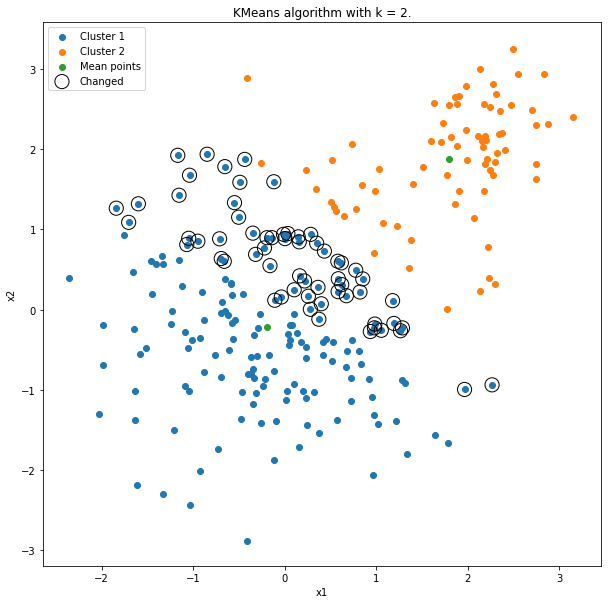

In [52]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
#import math
import random

mat = scipy.io.loadmat('hw5_p1a.mat')
X = mat['X']

#takes two points and returns the distance netween them as a float
def euclidian_distance(point_origin, point_target):
    delta_distance = [point_origin[0] - point_target[0], point_origin[1] - point_target[1]]
    return math.sqrt(delta_distance[0]**2 + delta_distance[1]**2)

def find_closest_class(mu, point):
    tmp = 0
    for i in range(1, len(mu)):
        if(euclidian_distance(mu[i], point) < euclidian_distance(mu[tmp], point)):
            tmp = i
    return tmp

# k is an arbitrary number of clusters that we wish to classify. Note that 0 is a class, so k = 2 would make 3 classes.

def kmeans(k, data):

    # z[n, k]= 0 means that x[n] does not belong to class k. z[n,k]= 1 means that it does belong to class k
    
    # Guess mu  
    prevmu = np.zeros((k, 2))
    mu = np.zeros((k,2))
    for i in range(0, k):
        mu[i] = [random.uniform(min(data[:, 0]), max(data[:, 0])), random.uniform(min(data[:, 1]), max(data[:, 1]))]
    iterations = 0
    while(not(np.array_equal(prevmu, mu))):
        iterations +=1
        # Loop through points and assign each point to its closest mean
        z = np.zeros((len(data), k))
        for i in range(0, len(data)):   
            class_ = find_closest_class(mu, data[i])
            # Set it in z
            z[i,class_] = 1
        if(iterations == 2):
            z_2 = np.copy(z)
            mu_2 = np.copy(mu)
        
        
        prevmu = np.copy(mu)
        
        for i in range(0,k):
            indices = [a for a, x in enumerate(z[:,i]) if x == 1]
            mu[i] = (np.mean(data[indices,0]),np.mean(data[indices,1]))
 
    plt.figure(figsize=(10,10))
    # Plot all clusters
    legend = []
    for i in range(0,k):
        indices = [a for a, x in enumerate(z[:,i]) if x == 1]
        plt.scatter(data[indices, 0], data[indices, 1])
        leg = ("Cluster %i" % (i+1))
        legend.append(leg)

    # Also plot mu
    plt.scatter(mu[:, 0], mu[:, 1])
    legend.append("Mean points")
    
    # Find the points which changes class from iteration 2 to convergence
    indices = [a for a, x in enumerate(np.abs(z-z_2)) if sum(x) != 0]
    # Plot them with small black circles
    plt.scatter(data[indices, 0], data[indices, 1],s=200, facecolors='none', edgecolors='k')
    legend.append("Changed")
    
    print("Finished the kmeans algorithm in %i iterations." % iterations)
    plt.title("KMeans algorithm with k = %i." % k)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend(legend)
    plt.show()

kmeans(2,X)